In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop(['CustomerId','Surname'], axis=1, inplace=True)

In [5]:
X=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df['Exited']

In [6]:
X= pd.get_dummies(X,columns=['Geography','Gender'],drop_first=True)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
model=Sequential()
model.add(Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.2)
y_pred=(model.predict(X_test)>0.5).astype("int32")
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
cm=confusion_matrix(y_test,y_pred)
print("confusion Matrix:\n",cm)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7656 - loss: 0.5419 - val_accuracy: 0.8225 - val_loss: 0.4157
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8139 - loss: 0.4365 - val_accuracy: 0.8506 - val_loss: 0.3883
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8299 - loss: 0.4014 - val_accuracy: 0.8544 - val_loss: 0.3693
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8438 - loss: 0.3723 - val_accuracy: 0.8562 - val_loss: 0.3595
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8397 - loss: 0.3819 - val_accuracy: 0.8556 - val_loss: 0.3540
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8455 - loss: 0.3710 - val_accuracy: 0.8587 - val_loss: 0.3500
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8545 - loss: 0.3539 - val_accuracy: 0.8544 - val_loss: 0.3487
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8486 - loss: 0.3545 - va

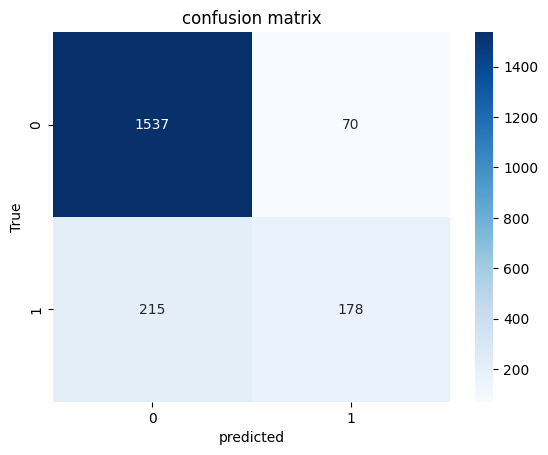

count of customers:248


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('confusion matrix')
plt.show()
count_leave=np.sum(y_pred)
print(f"count of customers:{count_leave}")